In [1]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 24.3 MB/s 
     |████████████████████████████████| 81 kB 10.3 MB/s 
     |████████████████████████████████| 209 kB 62.9 MB/s 
     |████████████████████████████████| 78 kB 8.4 MB/s 
     |████████████████████████████████| 112 kB 60.9 MB/s 
     |████████████████████████████████| 50 kB 3.5 MB/s 
     |████████████████████████████████| 147 kB 13.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=1dba0902485876a0a2ee8ff5d014e0bf9eee1ea2fa74a9cbc8fd70c44deccf46
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [2]:
import logging
import sys
import math
import optuna
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors as cm
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice

In [3]:
def my_plot_function(f, title: str, _x, _y, _z):
  x = np.linspace(-10, 10, 20) 
  y = np.linspace(-10, 10, 20) 
  X, Y = np.meshgrid(x, y)
  Z = f(X, Y)
  fig = plt.figure(figsize=(14, 10))
  ax = plt.axes(projection ='3d') 
  ax.plot_wireframe(X, Y, Z, rstride=1, cstride=1, alpha = 0.8)
  ax.scatter(_x, _y, _z, linewidths  = 8 , color='m', alpha = 1,
             label = 'Глобальный минимум')
  ax.legend(fontsize=10, loc='lower left' )
  ax.view_init(40, 45)
  ax.set_xlabel('x', fontsize=16)
  ax.set_ylabel('y', fontsize=16)
  ax.set_zlabel('z', fontsize=16)
  ax.set_title(title, fontsize=20)

In [4]:
def Matias(x: np.array, y:np.array) -> np.float128:
  return 0.26*(x*x + y*y) - 0.48*x*y
  
def Booth(x: np.array, y:np.array) -> np.float64:
  return (x + 2 * y - 7) * (x + 2 * y - 7) + (2 * x + y - 5) * (2 * x + y - 5)

In [5]:
def objective_Matias(trial):
  x = trial.suggest_float("x", -10, 10)
  y = trial.suggest_float("y", -10, 10)
  return Matias(x, y)
study = optuna.create_study()
study.optimize(objective_Matias, n_trials = 200)
best_params = study.best_params
found_x = best_params["x"]
found_y = best_params["y"]

[I 2022-11-21 13:26:05,144] A new study created in memory with name: no-name-b73c81ad-9cdf-4ffa-8fd5-aaebf5326d2e
[I 2022-11-21 13:26:05,152] Trial 0 finished with value: 71.81033762060585 and parameters: {'x': 8.997372001943383, 'y': -7.94952834677515}. Best is trial 0 with value: 71.81033762060585.
[I 2022-11-21 13:26:05,155] Trial 1 finished with value: 17.429797335013543 and parameters: {'x': 8.228301693469394, 'y': 0.04405372729968171}. Best is trial 1 with value: 17.429797335013543.
[I 2022-11-21 13:26:05,158] Trial 2 finished with value: 11.396436032139512 and parameters: {'x': 8.114941437756546, 'y': 1.651966544801457}. Best is trial 2 with value: 11.396436032139512.
[I 2022-11-21 13:26:05,163] Trial 3 finished with value: 2.5523088533704357 and parameters: {'x': -5.669469897126498, 'y': -2.9835329930274384}. Best is trial 3 with value: 2.5523088533704357.
[I 2022-11-21 13:26:05,167] Trial 4 finished with value: 36.85807648555232 and parameters: {'x': 4.446220680807421, 'y': -7

Результат работы Opruna для поиска оптимума функции Матьяса: x, y, z =  -0.2009070663364403 -0.2009070663364403 0.0016145459721565933


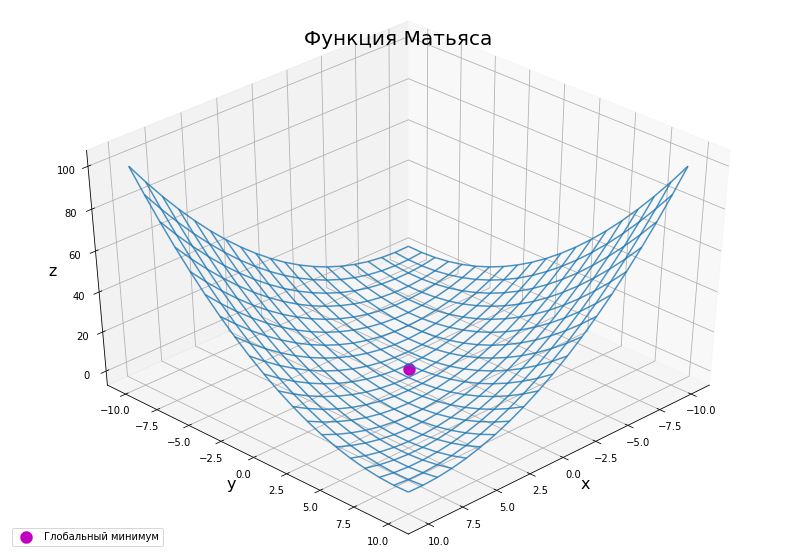

In [6]:
found_z = Matias(found_x, found_x)
print("Результат работы Opruna для поиска оптимума функции Матьяса: x, y, z = ",
      found_x, found_x, found_z)
my_plot_function(Matias, "Функция Матьяса", found_x, found_y, found_z )

In [7]:
def objective_Booth(trial):
  x = trial.suggest_float("x", -10, 10)
  y = trial.suggest_float("y", -10, 10)
  return Booth(x, y)
study = optuna.create_study()
study.optimize(objective_Booth, n_trials = 200)
best_params = study.best_params
found_x = best_params["x"]
found_y = best_params["y"]

[I 2022-11-21 13:26:08,400] A new study created in memory with name: no-name-a0dc63d3-4cf0-4158-8563-ef9c8432d0f9
[I 2022-11-21 13:26:08,405] Trial 0 finished with value: 204.54286959772708 and parameters: {'x': 7.194196387357266, 'y': 3.250031359853164}. Best is trial 0 with value: 204.54286959772708.
[I 2022-11-21 13:26:08,409] Trial 1 finished with value: 80.1877061648826 and parameters: {'x': 2.169455154591734, 'y': 6.007175546134917}. Best is trial 1 with value: 80.1877061648826.
[I 2022-11-21 13:26:08,417] Trial 2 finished with value: 19.973988074165774 and parameters: {'x': -1.0032388123214613, 'y': 6.199503680129833}. Best is trial 2 with value: 19.973988074165774.
[I 2022-11-21 13:26:08,420] Trial 3 finished with value: 60.270974998601304 and parameters: {'x': -4.233685751080927, 'y': 5.705980321347603}. Best is trial 2 with value: 19.973988074165774.
[I 2022-11-21 13:26:08,423] Trial 4 finished with value: 4.3453400479816935 and parameters: {'x': 1.1284626004740979, 'y': 1.96

Результат работы Optuna для поиска оптимума функции Бута: x, y, z =  1.1213626852657523 1.1213626852657523 15.896063555181367


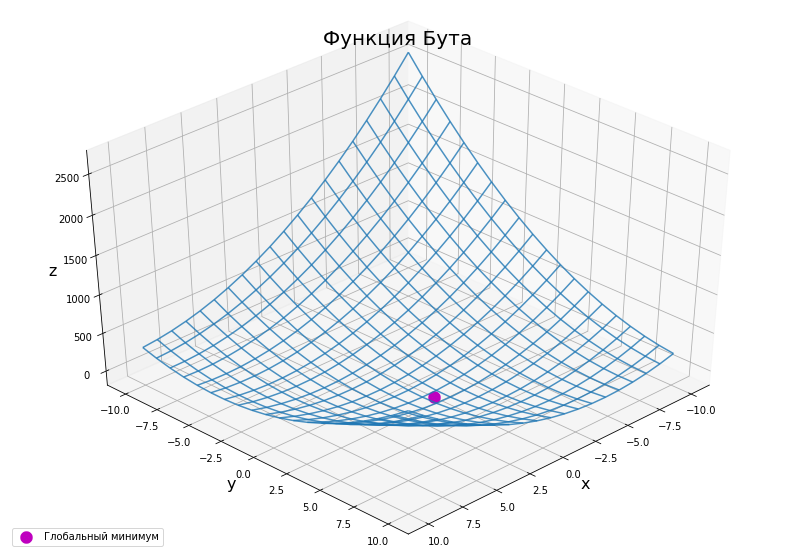

In [8]:
print("Результат работы Optuna для поиска оптимума функции Бута: x, y, z = ",
      found_x, found_x, Booth(found_x, found_x))
my_plot_function(Booth, "Функция Бута", found_x, found_y, found_z)

In [9]:
X, y = load_wine(return_X_y=True)
train_x, valid_x, train_y, valid_y = train_test_split(X, y)

def objective(trial):
  C = trial.suggest_float("C", 1e-5, 1, log=True)
  tol = trial.suggest_float("tol", 1e-1, 10, log=True)
  solver = trial.suggest_categorical("solver", ["newton-cg", "lbfgs", "liblinear",
                                                "sag", "saga"])
  clf = LogisticRegression(C=C, tol=tol, solver=solver)
  for step in range(100):
    clf.fit(train_x, train_y)
    intermediate_value = clf.score(valid_x, valid_y)
    trial.report(intermediate_value, step=step)
    if trial.should_prune():
      raise optuna.TrialPruned()
    return clf.score(valid_x, valid_y)

optuna.logging.get_logger("optuna").addHandler(logging.StreamHandler(sys.stdout))
study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))
study.optimize(objective, n_trials=30)

[I 2022-11-21 13:26:11,847] A new study created in memory with name: no-name-bce25433-ba7e-4a2e-a223-97356b7710f5


A new study created in memory with name: no-name-bce25433-ba7e-4a2e-a223-97356b7710f5


[I 2022-11-21 13:26:11,873] Trial 0 finished with value: 0.4444444444444444 and parameters: {'C': 0.0018968870882719298, 'tol': 0.7522090614321373, 'solver': 'saga'}. Best is trial 0 with value: 0.4444444444444444.


Trial 0 finished with value: 0.4444444444444444 and parameters: {'C': 0.0018968870882719298, 'tol': 0.7522090614321373, 'solver': 'saga'}. Best is trial 0 with value: 0.4444444444444444.


[I 2022-11-21 13:26:11,890] Trial 1 finished with value: 0.35555555555555557 and parameters: {'C': 0.00018885222775429867, 'tol': 3.621605100898615, 'solver': 'sag'}. Best is trial 1 with value: 0.35555555555555557.


Trial 1 finished with value: 0.35555555555555557 and parameters: {'C': 0.00018885222775429867, 'tol': 3.621605100898615, 'solver': 'sag'}. Best is trial 1 with value: 0.35555555555555557.


[I 2022-11-21 13:26:11,922] Trial 2 finished with value: 0.6888888888888889 and parameters: {'C': 0.00018170182000442917, 'tol': 0.17061187459100888, 'solver': 'liblinear'}. Best is trial 1 with value: 0.35555555555555557.


Trial 2 finished with value: 0.6888888888888889 and parameters: {'C': 0.00018170182000442917, 'tol': 0.17061187459100888, 'solver': 'liblinear'}. Best is trial 1 with value: 0.35555555555555557.


[I 2022-11-21 13:26:11,941] Trial 3 finished with value: 0.37777777777777777 and parameters: {'C': 0.0360273082335443, 'tol': 2.5296412748350345, 'solver': 'sag'}. Best is trial 1 with value: 0.35555555555555557.


Trial 3 finished with value: 0.37777777777777777 and parameters: {'C': 0.0360273082335443, 'tol': 2.5296412748350345, 'solver': 'sag'}. Best is trial 1 with value: 0.35555555555555557.


[I 2022-11-21 13:26:11,980] Trial 4 finished with value: 0.6888888888888889 and parameters: {'C': 0.004440688068779747, 'tol': 0.11047301561189529, 'solver': 'liblinear'}. Best is trial 1 with value: 0.35555555555555557.


Trial 4 finished with value: 0.6888888888888889 and parameters: {'C': 0.004440688068779747, 'tol': 0.11047301561189529, 'solver': 'liblinear'}. Best is trial 1 with value: 0.35555555555555557.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[I 2022-11-21 13:26:12,060] Trial 5 finished with value: 0.9555555555555556 and parameters: {'C': 0.056272332954203044, 'tol': 1.8465684024799758, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.35555555555555557.


Trial 5 finished with value: 0.9555555555555556 and parameters: {'C': 0.056272332954203044, 'tol': 1.8465684024799758, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.35555555555555557.


[I 2022-11-21 13:26:12,179] Trial 6 finished with value: 0.9777777777777777 and parameters: {'C': 0.08577256632635477, 'tol': 0.2611948179499927, 'solver': 'newton-cg'}. Best is trial 1 with value: 0.35555555555555557.


Trial 6 finished with value: 0.9777777777777777 and parameters: {'C': 0.08577256632635477, 'tol': 0.2611948179499927, 'solver': 'newton-cg'}. Best is trial 1 with value: 0.35555555555555557.


[I 2022-11-21 13:26:12,263] Trial 7 finished with value: 0.7111111111111111 and parameters: {'C': 0.0003001240063191069, 'tol': 1.6189969892724903, 'solver': 'newton-cg'}. Best is trial 1 with value: 0.35555555555555557.


Trial 7 finished with value: 0.7111111111111111 and parameters: {'C': 0.0003001240063191069, 'tol': 1.6189969892724903, 'solver': 'newton-cg'}. Best is trial 1 with value: 0.35555555555555557.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[I 2022-11-21 13:26:12,338] Trial 8 finished with value: 0.8222222222222222 and parameters: {'C': 0.0009448003080769801, 'tol': 0.36705839480791635, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.35555555555555557.


Trial 8 finished with value: 0.8222222222222222 and parameters: {'C': 0.0009448003080769801, 'tol': 0.36705839480791635, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.35555555555555557.


[I 2022-11-21 13:26:12,347] Trial 9 finished with value: 0.6444444444444445 and parameters: {'C': 0.5168467583360563, 'tol': 0.42633134659629784, 'solver': 'saga'}. Best is trial 1 with value: 0.35555555555555557.


Trial 9 finished with value: 0.6444444444444445 and parameters: {'C': 0.5168467583360563, 'tol': 0.42633134659629784, 'solver': 'saga'}. Best is trial 1 with value: 0.35555555555555557.


[I 2022-11-21 13:26:12,379] Trial 10 finished with value: 0.37777777777777777 and parameters: {'C': 1.0716133413774103e-05, 'tol': 9.123172767268835, 'solver': 'sag'}. Best is trial 1 with value: 0.35555555555555557.


Trial 10 finished with value: 0.37777777777777777 and parameters: {'C': 1.0716133413774103e-05, 'tol': 9.123172767268835, 'solver': 'sag'}. Best is trial 1 with value: 0.35555555555555557.


[I 2022-11-21 13:26:12,405] Trial 11 finished with value: 0.26666666666666666 and parameters: {'C': 2.2385247191186455e-05, 'tol': 6.501021423755706, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


Trial 11 finished with value: 0.26666666666666666 and parameters: {'C': 2.2385247191186455e-05, 'tol': 6.501021423755706, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:12,434] Trial 12 finished with value: 0.37777777777777777 and parameters: {'C': 1.385284421214448e-05, 'tol': 7.052133441372738, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


Trial 12 finished with value: 0.37777777777777777 and parameters: {'C': 1.385284421214448e-05, 'tol': 7.052133441372738, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:12,464] Trial 13 finished with value: 0.26666666666666666 and parameters: {'C': 5.302335534736313e-05, 'tol': 3.8559273358658634, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


Trial 13 finished with value: 0.26666666666666666 and parameters: {'C': 5.302335534736313e-05, 'tol': 3.8559273358658634, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:12,490] Trial 14 finished with value: 0.37777777777777777 and parameters: {'C': 4.130116889164694e-05, 'tol': 5.731193895849517, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


Trial 14 finished with value: 0.37777777777777777 and parameters: {'C': 4.130116889164694e-05, 'tol': 5.731193895849517, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:12,515] Trial 15 finished with value: 0.26666666666666666 and parameters: {'C': 5.1223386214509735e-05, 'tol': 4.110082816738721, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


Trial 15 finished with value: 0.26666666666666666 and parameters: {'C': 5.1223386214509735e-05, 'tol': 4.110082816738721, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:12,542] Trial 16 finished with value: 0.4 and parameters: {'C': 5.450833475186804e-05, 'tol': 0.9870326560121749, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


Trial 16 finished with value: 0.4 and parameters: {'C': 5.450833475186804e-05, 'tol': 0.9870326560121749, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:12,569] Trial 17 finished with value: 0.35555555555555557 and parameters: {'C': 0.0005830022360176221, 'tol': 4.362054733462357, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


Trial 17 finished with value: 0.35555555555555557 and parameters: {'C': 0.0005830022360176221, 'tol': 4.362054733462357, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:12,601] Trial 18 finished with value: 0.7111111111111111 and parameters: {'C': 0.013387167644835551, 'tol': 2.833471396625323, 'solver': 'liblinear'}. Best is trial 11 with value: 0.26666666666666666.


Trial 18 finished with value: 0.7111111111111111 and parameters: {'C': 0.013387167644835551, 'tol': 2.833471396625323, 'solver': 'liblinear'}. Best is trial 11 with value: 0.26666666666666666.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
[I 2022-11-21 13:26:12,684] Trial 19 finished with value: 0.6888888888888889 and parameters: {'C': 8.682347007720991e-05, 'tol': 1.4830486952650017, 'solver': 'lbfgs'}. Best is trial 11 with value: 0.26666666666666666.


Trial 19 finished with value: 0.6888888888888889 and parameters: {'C': 8.682347007720991e-05, 'tol': 1.4830486952650017, 'solver': 'lbfgs'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:12,811] Trial 20 finished with value: 0.9111111111111111 and parameters: {'C': 0.005194624009228596, 'tol': 0.6992065194185176, 'solver': 'newton-cg'}. Best is trial 11 with value: 0.26666666666666666.


Trial 20 finished with value: 0.9111111111111111 and parameters: {'C': 0.005194624009228596, 'tol': 0.6992065194185176, 'solver': 'newton-cg'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:12,837] Trial 21 finished with value: 0.26666666666666666 and parameters: {'C': 2.4649662149321858e-05, 'tol': 5.87860069234582, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


Trial 21 finished with value: 0.26666666666666666 and parameters: {'C': 2.4649662149321858e-05, 'tol': 5.87860069234582, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:12,865] Trial 22 finished with value: 0.37777777777777777 and parameters: {'C': 8.363629165674687e-05, 'tol': 4.337766059624144, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


Trial 22 finished with value: 0.37777777777777777 and parameters: {'C': 8.363629165674687e-05, 'tol': 4.337766059624144, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:12,892] Trial 23 finished with value: 0.37777777777777777 and parameters: {'C': 2.8606126709896146e-05, 'tol': 9.195643848585233, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


Trial 23 finished with value: 0.37777777777777777 and parameters: {'C': 2.8606126709896146e-05, 'tol': 9.195643848585233, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:12,921] Trial 24 finished with value: 0.26666666666666666 and parameters: {'C': 1.8243632004618654e-05, 'tol': 7.1597646770132926, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


Trial 24 finished with value: 0.26666666666666666 and parameters: {'C': 1.8243632004618654e-05, 'tol': 7.1597646770132926, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:12,948] Trial 25 finished with value: 0.37777777777777777 and parameters: {'C': 1.0431494482560467e-05, 'tol': 2.4154610250304884, 'solver': 'saga'}. Best is trial 11 with value: 0.26666666666666666.


Trial 25 finished with value: 0.37777777777777777 and parameters: {'C': 1.0431494482560467e-05, 'tol': 2.4154610250304884, 'solver': 'saga'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:12,992] Trial 26 finished with value: 0.6444444444444445 and parameters: {'C': 0.00043277313651746206, 'tol': 3.6448484456131633, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


Trial 26 finished with value: 0.6444444444444445 and parameters: {'C': 0.00043277313651746206, 'tol': 3.6448484456131633, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:13,022] Trial 27 finished with value: 0.37777777777777777 and parameters: {'C': 0.00012986109975154477, 'tol': 5.6218317686331325, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


Trial 27 finished with value: 0.37777777777777777 and parameters: {'C': 0.00012986109975154477, 'tol': 5.6218317686331325, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:13,093] Trial 28 finished with value: 0.4 and parameters: {'C': 2.338952271010583e-05, 'tol': 9.980602086409185, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


Trial 28 finished with value: 0.4 and parameters: {'C': 2.338952271010583e-05, 'tol': 9.980602086409185, 'solver': 'sag'}. Best is trial 11 with value: 0.26666666666666666.


[I 2022-11-21 13:26:13,221] Trial 29 finished with value: 0.8444444444444444 and parameters: {'C': 0.0016687463232842772, 'tol': 6.913639051562295, 'solver': 'lbfgs'}. Best is trial 11 with value: 0.26666666666666666.


Trial 29 finished with value: 0.8444444444444444 and parameters: {'C': 0.0016687463232842772, 'tol': 6.913639051562295, 'solver': 'lbfgs'}. Best is trial 11 with value: 0.26666666666666666.


In [10]:
plot_optimization_history(study)

In [11]:
plot_parallel_coordinate(study)

In [12]:
plot_param_importances(study)

In [13]:
plot_contour(study)

In [14]:
plot_slice(study)

In [15]:
plot_edf(study)